# Exploratory Data Analysis - Customer Churn Dataset

This notebook explores the Telco Customer Churn dataset and provides comprehensive visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## 1. Load and Inspect Data

In [2]:
# Load dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data types and missing values
print("Data Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2. Target Variable Analysis

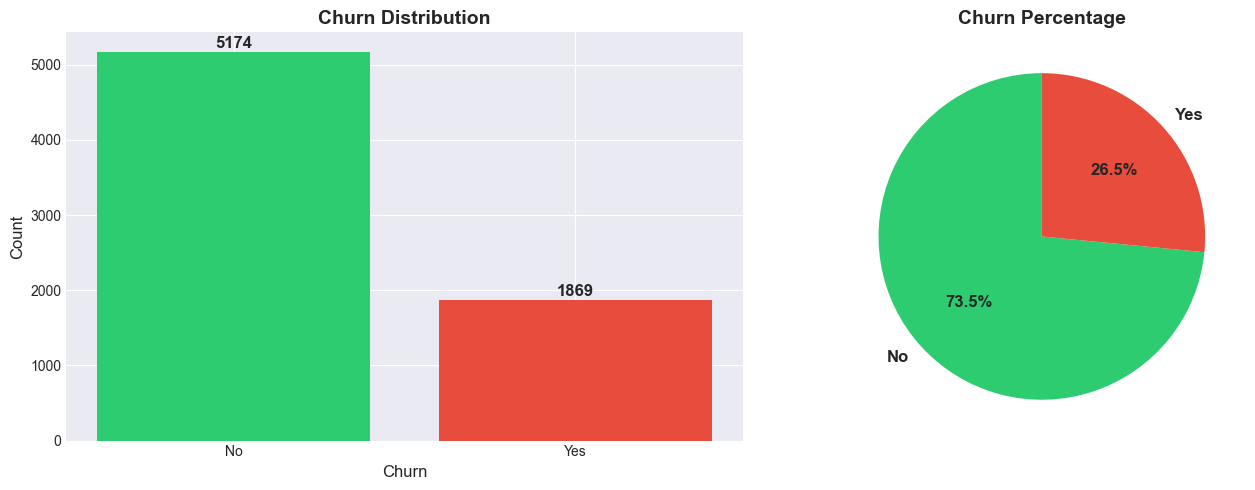

Churn Rate: 26.54%


In [4]:
# Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/figures/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Churn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

## 3. Numerical Features Analysis

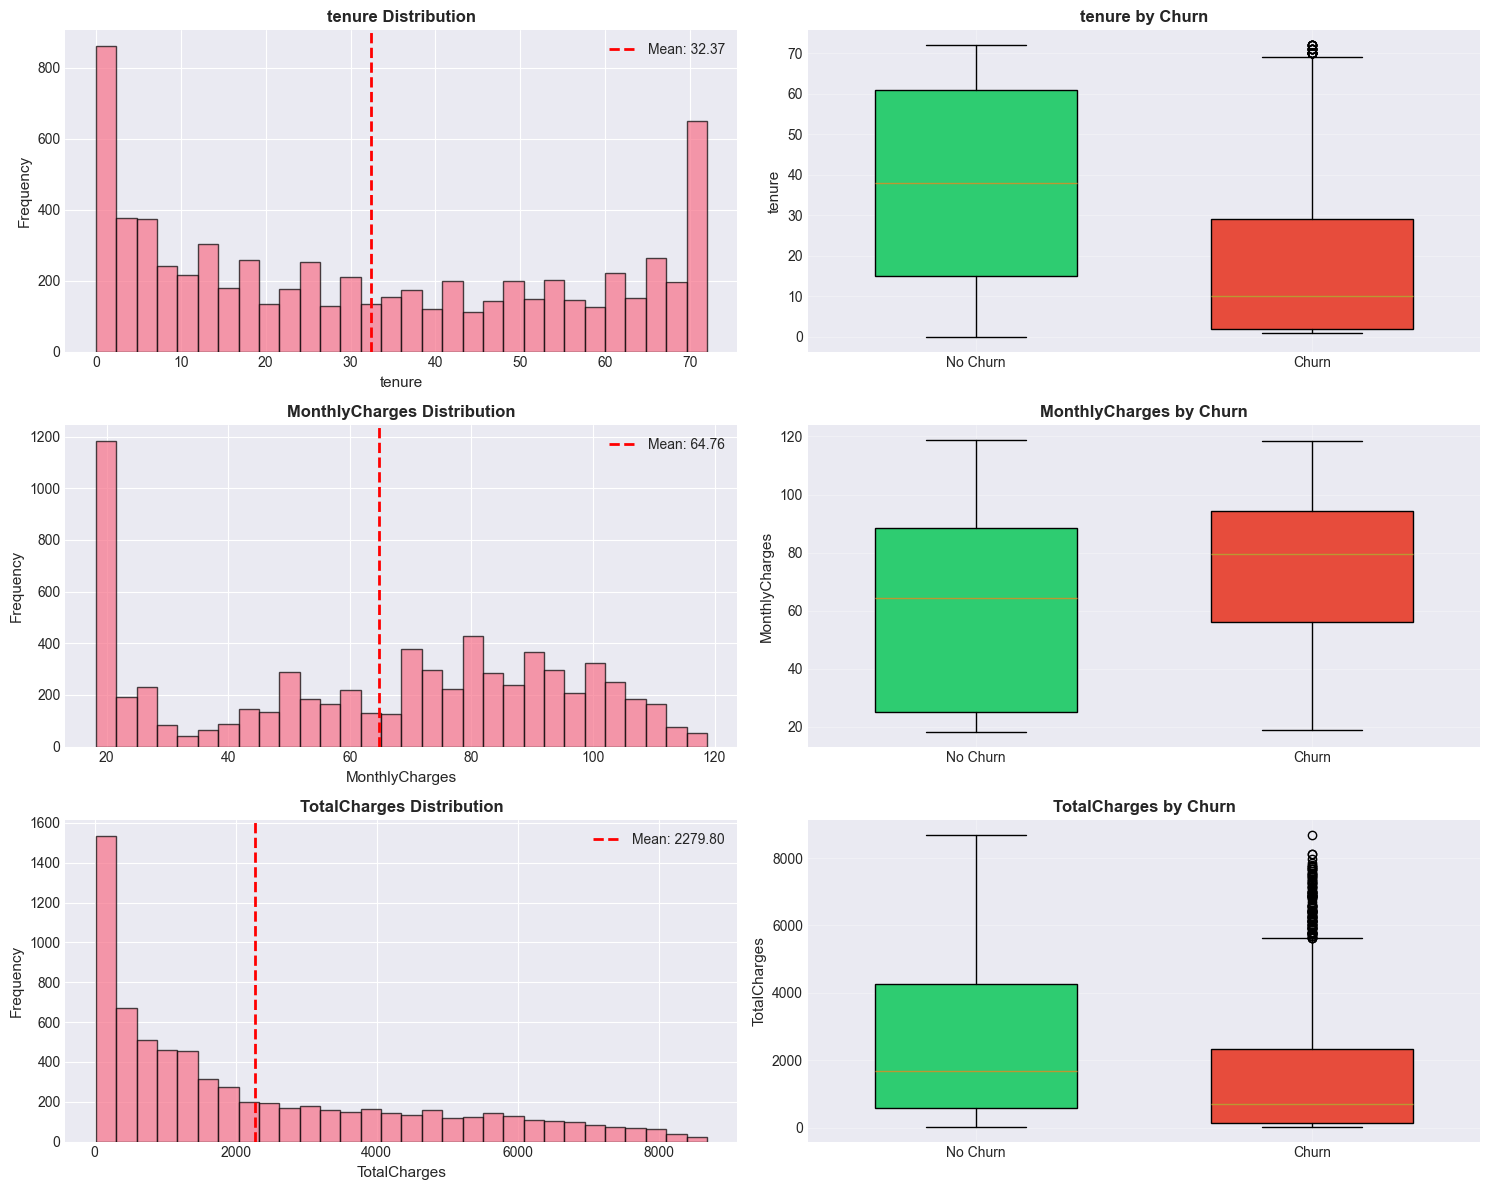

In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

# Numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for idx, feature in enumerate(numerical_features):
    # Distribution plot
    axes[idx, 0].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_xlabel(feature, fontsize=11)
    axes[idx, 0].set_ylabel('Frequency', fontsize=11)
    axes[idx, 0].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx, 0].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    axes[idx, 0].legend()
    
    # Box plot by churn
    churn_yes = df[df['Churn'] == 'Yes'][feature]
    churn_no = df[df['Churn'] == 'No'][feature]
    
    bp = axes[idx, 1].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'], 
                               patch_artist=True, widths=0.6)
    for patch, color in zip(bp['boxes'], ['#2ecc71', '#e74c3c']):
        patch.set_facecolor(color)
    axes[idx, 1].set_ylabel(feature, fontsize=11)
    axes[idx, 1].set_title(f'{feature} by Churn', fontsize=12, fontweight='bold')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/figures/numerical_features.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Categorical Features Analysis

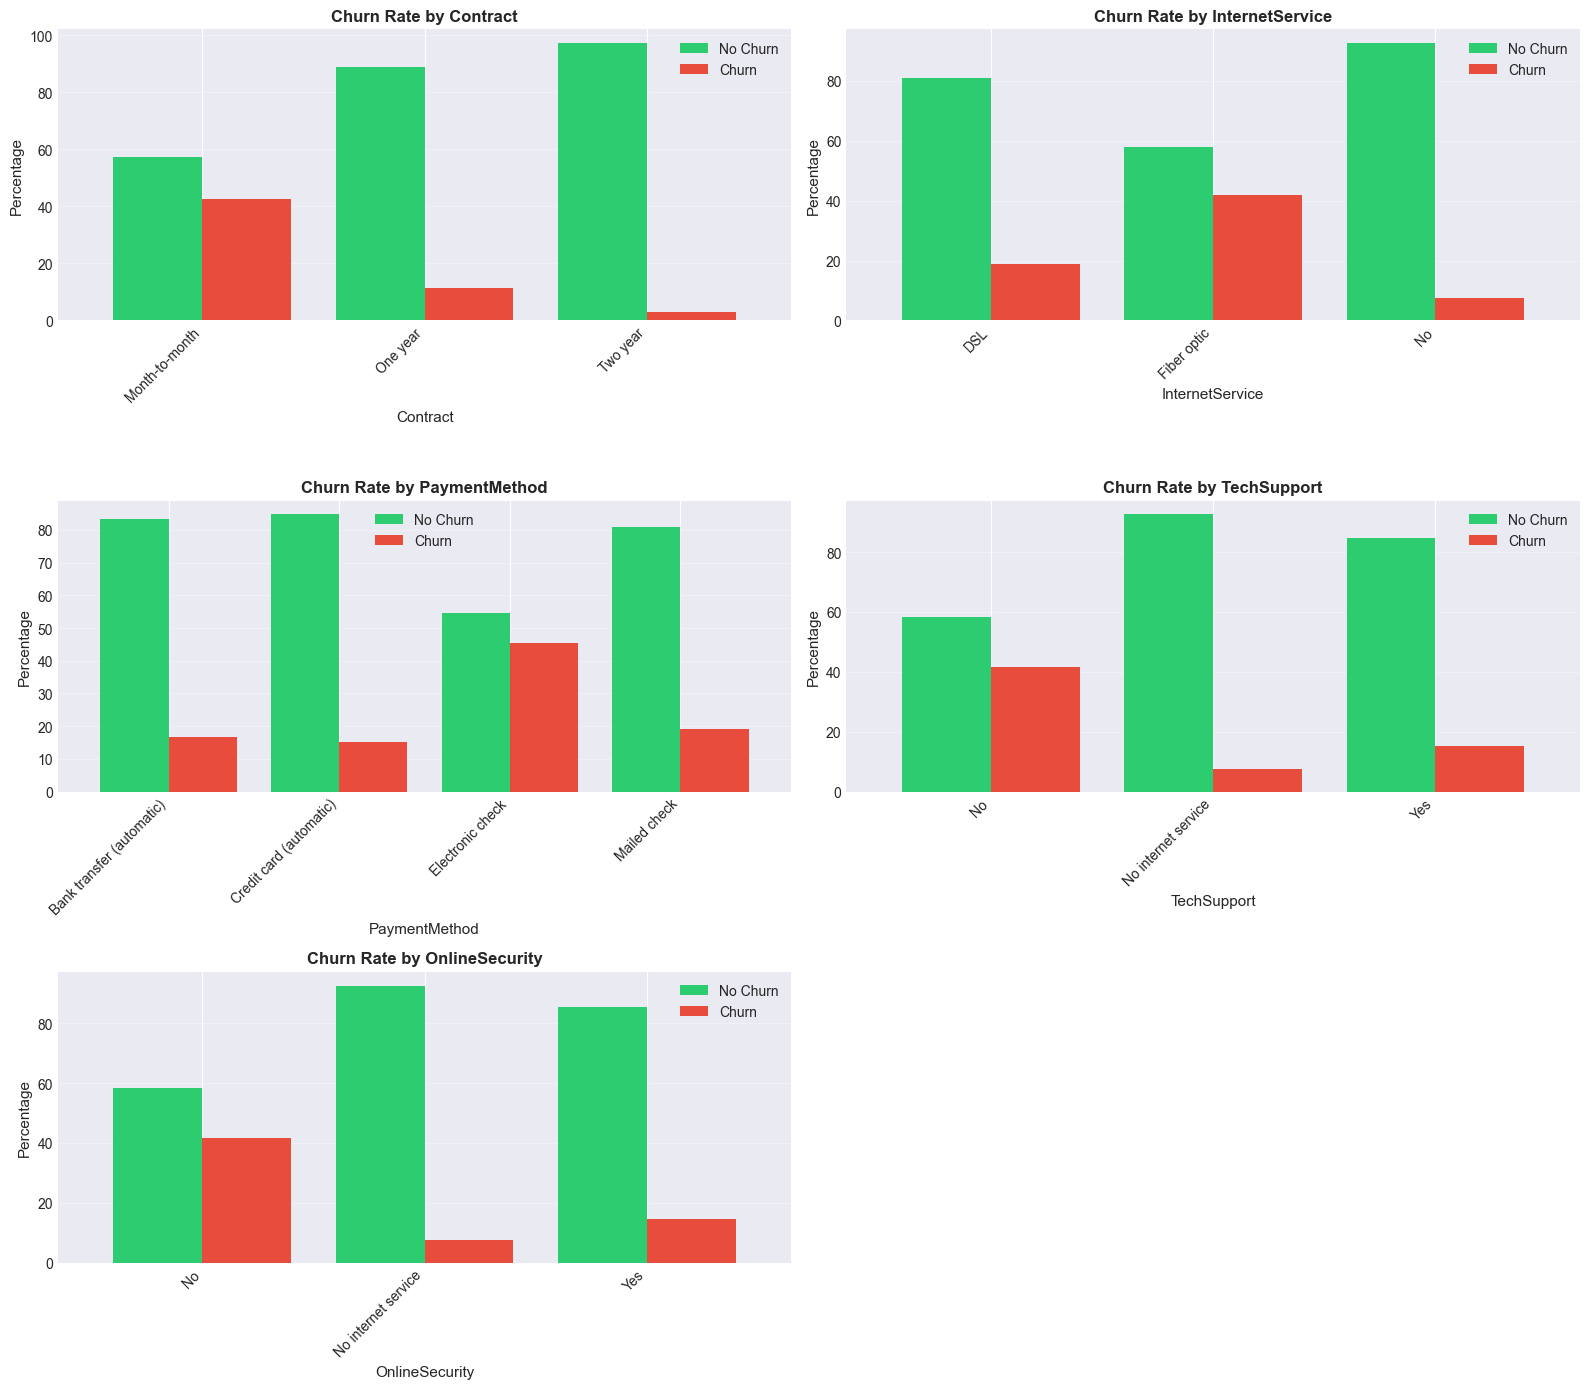

In [6]:
# Key categorical features
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    # Create cross-tabulation
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], width=0.8)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Percentage', fontsize=11)
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    axes[idx].legend(['No Churn', 'Churn'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../notebooks/figures/categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Correlation Analysis

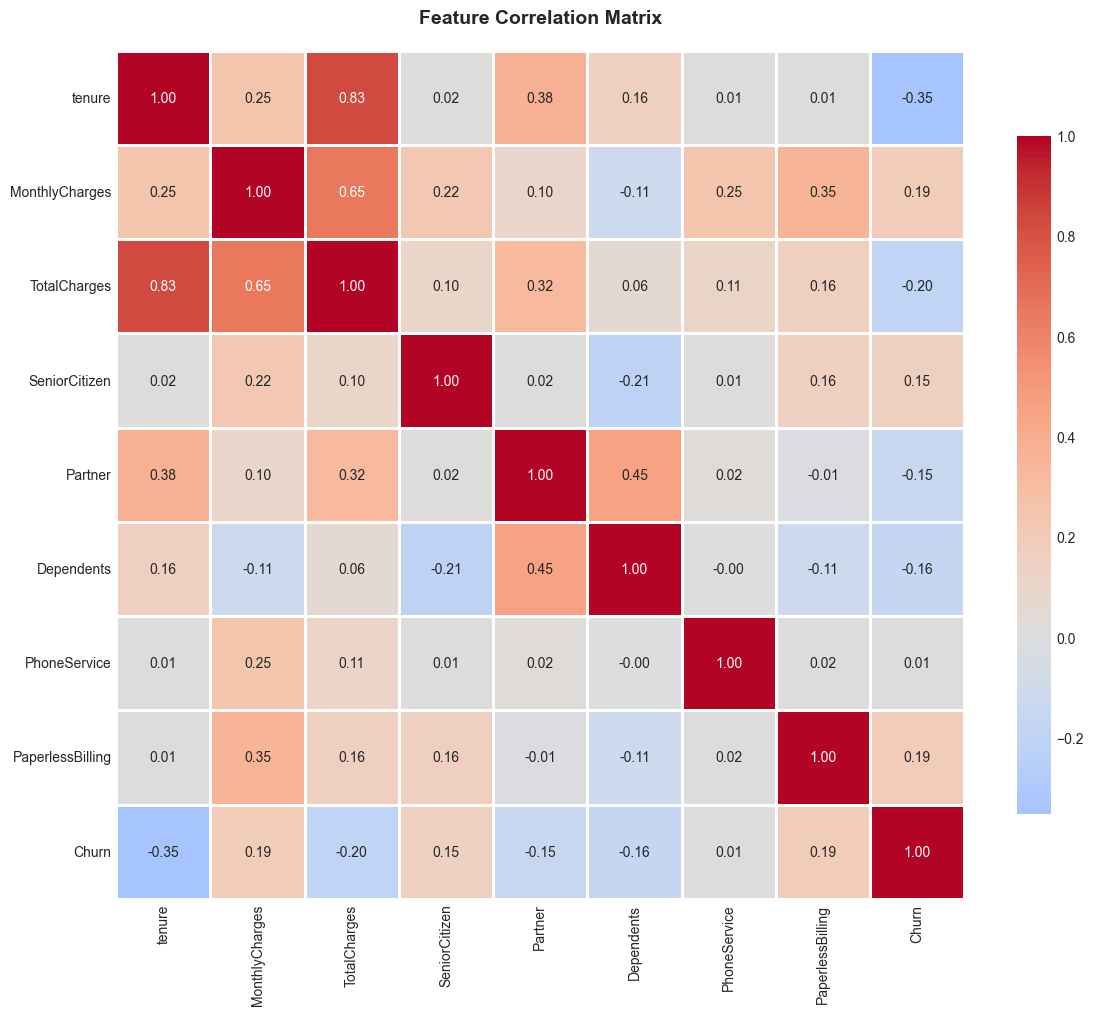


Features Correlation with Churn:
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198347
tenure             -0.352229
Name: Churn, dtype: float64


In [7]:
# Prepare data for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
df_corr['gender'] = df_corr['gender'].map({'Male': 1, 'Female': 0})
df_corr['Partner'] = df_corr['Partner'].map({'Yes': 1, 'No': 0})
df_corr['Dependents'] = df_corr['Dependents'].map({'Yes': 1, 'No': 0})
df_corr['PhoneService'] = df_corr['PhoneService'].map({'Yes': 1, 'No': 0})
df_corr['PaperlessBilling'] = df_corr['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Select numerical columns
corr_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 
                'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
corr_matrix = df_corr[corr_features].corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../notebooks/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Churn correlation
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("\nFeatures Correlation with Churn:")
print(churn_corr)

## 6. Key Insights Summary

In [8]:
print("=" * 60)
print("KEY INSIGHTS FROM EDA")
print("=" * 60)

print(f"\n1. Churn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")
print("   → Imbalanced dataset, need to handle during training")

print(f"\n2. Tenure Statistics:")
print(f"   - Mean Tenure (No Churn): {df[df['Churn']=='No']['tenure'].mean():.1f} months")
print(f"   - Mean Tenure (Churn): {df[df['Churn']=='Yes']['tenure'].mean():.1f} months")
print("   → New customers more likely to churn")

print(f"\n3. Contract Type Impact:")
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')['Yes'] * 100
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}% churn rate")
print("   → Month-to-month contracts have highest churn")

print(f"\n4. Monthly Charges:")
print(f"   - Mean (No Churn): ${df[df['Churn']=='No']['MonthlyCharges'].mean():.2f}")
print(f"   - Mean (Churn): ${df[df['Churn']=='Yes']['MonthlyCharges'].mean():.2f}")
print("   → Higher charges associated with churn")

print("\n" + "=" * 60)

KEY INSIGHTS FROM EDA

1. Churn Rate: 26.54%
   → Imbalanced dataset, need to handle during training

2. Tenure Statistics:
   - Mean Tenure (No Churn): 37.6 months
   - Mean Tenure (Churn): 18.0 months
   → New customers more likely to churn

3. Contract Type Impact:
   - Month-to-month: 42.7% churn rate
   - One year: 11.3% churn rate
   - Two year: 2.8% churn rate
   → Month-to-month contracts have highest churn

4. Monthly Charges:
   - Mean (No Churn): $61.27
   - Mean (Churn): $74.44
   → Higher charges associated with churn

